In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [41]:
from adjustText import adjust_text

In [2]:
harden_data = pd.read_csv('harden_stats_three_point_era.csv')

In [4]:
plt.style.use('fivethirtyeight')

In [8]:
harden_data.TS_PCT = harden_data.TS_PCT * 100

In [63]:
harden_only = harden_data.loc[harden_data.Player == 'James Harden']

In [46]:
top_efficiency = harden_data.sort_values(by='TS_PCT', ascending=False).iloc[:4]

In [47]:
top_scorers = harden_data.iloc[:6]

5

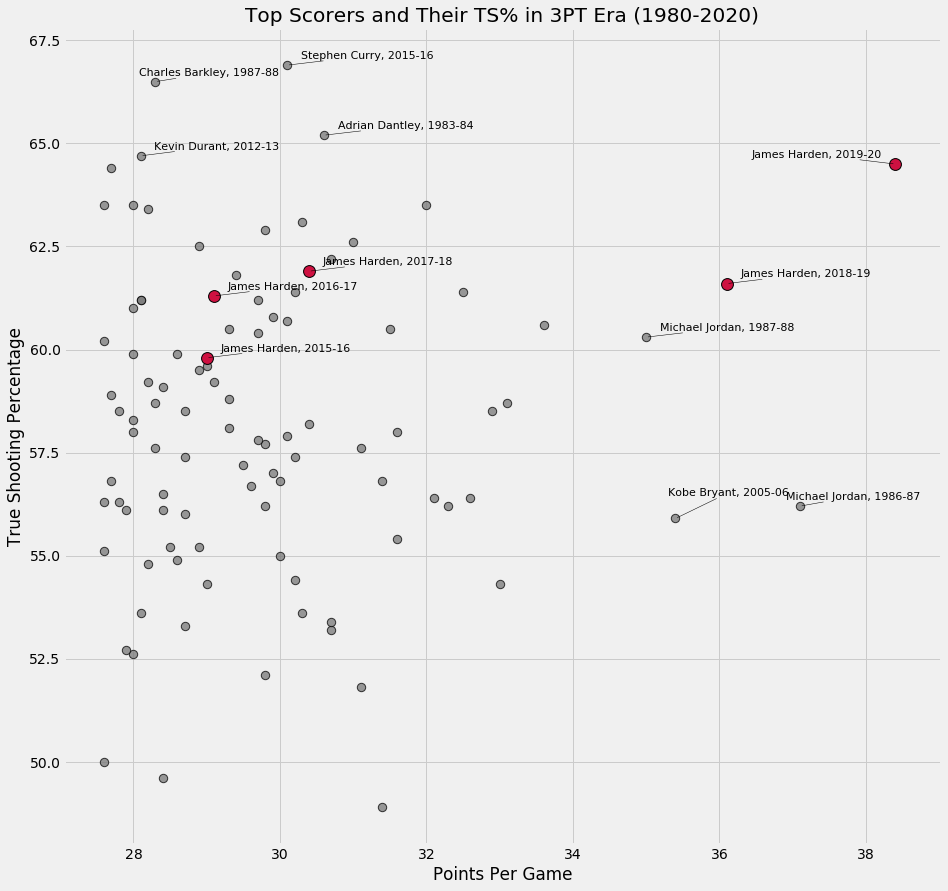

In [75]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(x=harden_data.PTS, y=harden_data.TS_PCT, s=70, alpha=0.75, color="#787878", edgecolors='k', lw=1)

ax.scatter(x=harden_only.PTS, y=harden_only.TS_PCT, s=140, alpha=1.0, color="#CE1141", edgecolors='k', lw=1)
ax.set_title('Top Scorers and Their TS% in 3PT Era (1980-2020)')
ax.set_xlabel("Points Per Game")
ax.set_ylabel("True Shooting Percentage")

texts = []
added_text = []

for index in range(len(top_efficiency)):
    item = top_efficiency.iloc[index]
    text = f"{item.Player}, {item.Season}"
    if text in added_text:
        continue
    added_text.append(text)
    texts.append(ax.text(item.PTS, item.TS_PCT, s=text, fontsize=11))

for index in range(len(top_scorers)):
    item = top_scorers.iloc[index]
    text = f"{item.Player}, {item.Season}"
    if text in added_text:
        continue
    added_text.append(text)
    texts.append(ax.text(item.PTS, item.TS_PCT, s=text, fontsize=11))
    
for index in range(len(harden_only)):
    item = harden_only.iloc[index]
    text = f"{item.Player}, {item.Season}"
    if text in added_text:
        continue
    added_text.append(text)
    texts.append(ax.text(item.PTS, item.TS_PCT, s=text, fontsize=11))
    
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.3, 1.5), expand_text=(0.8, 1.8), force_points=(0.7, 1.8))